In [2]:
### Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
### Load Data

data = '../data/labeled/calibration_merged.csv'   # merged dataset (calibration)
df = pd.read_csv(data, index_col=0)

Index(['ts_r', 'acc_x_r', 'acc_y_r', 'acc_z_r', 'temp_r', 'gyr_x_r', 'gyr_y_r',
       'gyr_z_r', 'mag_x_r', 'mag_y_r', 'mag_z_r', 'kal_status_r', 'alpha_r',
       'beta_r', 'ts_n', 'acc_x_n', 'acc_y_n', 'acc_z_n', 'temp_n', 'gyr_x_n',
       'gyr_y_n', 'gyr_z_n', 'mag_x_n', 'mag_y_n', 'mag_z_n', 'kal_status_n',
       'alpha_n', 'beta_n', 'started', 'calibrated', 'monitoring', 'zone',
       'in_bending_orange_zone', 'in_bending_red_zone', 'in_overreach_zone',
       'bending_buzzing', 'overreach_buzzing', 'walking', 'vibrating',
       'static_posture', 'label', 'label2'],
      dtype='object')

In [4]:
### Add alpha_r and beta_r difference column

diff_list = []
index = 0

for a in df['alpha_r']:
    diff = a - df.loc[index, 'beta_r']
    diff_list.append(diff)
    index = index + 1

df['ab_r_diff'] = diff_list

In [3]:
### Add 'seconds' column (only for individual files)

counter = 1
seconds = 1
sec_list = []

for x in range(len(df)):
    if counter <= 25:
        sec_list.append(seconds)
        counter = counter + 1
    else:
        seconds = seconds + 1
        sec_list.append(seconds)
        counter = 2

df['seconds'] = sec_list

In [5]:
### Drop some columns and remove first 75 rows

df_analysis = df.drop(['ts_r', 'temp_r', 'mag_x_r', 'mag_y_r', 'mag_z_r', 'ts_n', 'temp_n', 'mag_x_n', 'mag_y_n', 'mag_z_n', 'kal_status_n', 
                        'alpha_n', 'beta_n'], axis=1)
df_analysis.drop(df_analysis[df_analysis['monitoring'] == False].index, inplace=True)

Index(['acc_x_r', 'acc_y_r', 'acc_z_r', 'gyr_x_r', 'gyr_y_r', 'gyr_z_r',
       'mag_x_r', 'mag_y_r', 'mag_z_r', 'alpha_r', 'beta_r', 'acc_x_n',
       'acc_y_n', 'acc_z_n', 'gyr_x_n', 'gyr_y_n', 'gyr_z_n', 'mag_x_n',
       'mag_y_n', 'mag_z_n', 'started', 'calibrated', 'monitoring', 'zone',
       'in_bending_orange_zone', 'in_bending_red_zone', 'in_overreach_zone',
       'bending_buzzing', 'overreach_buzzing', 'walking', 'vibrating',
       'static_posture', 'label', 'label2', 'ab_r_diff'],
      dtype='object')

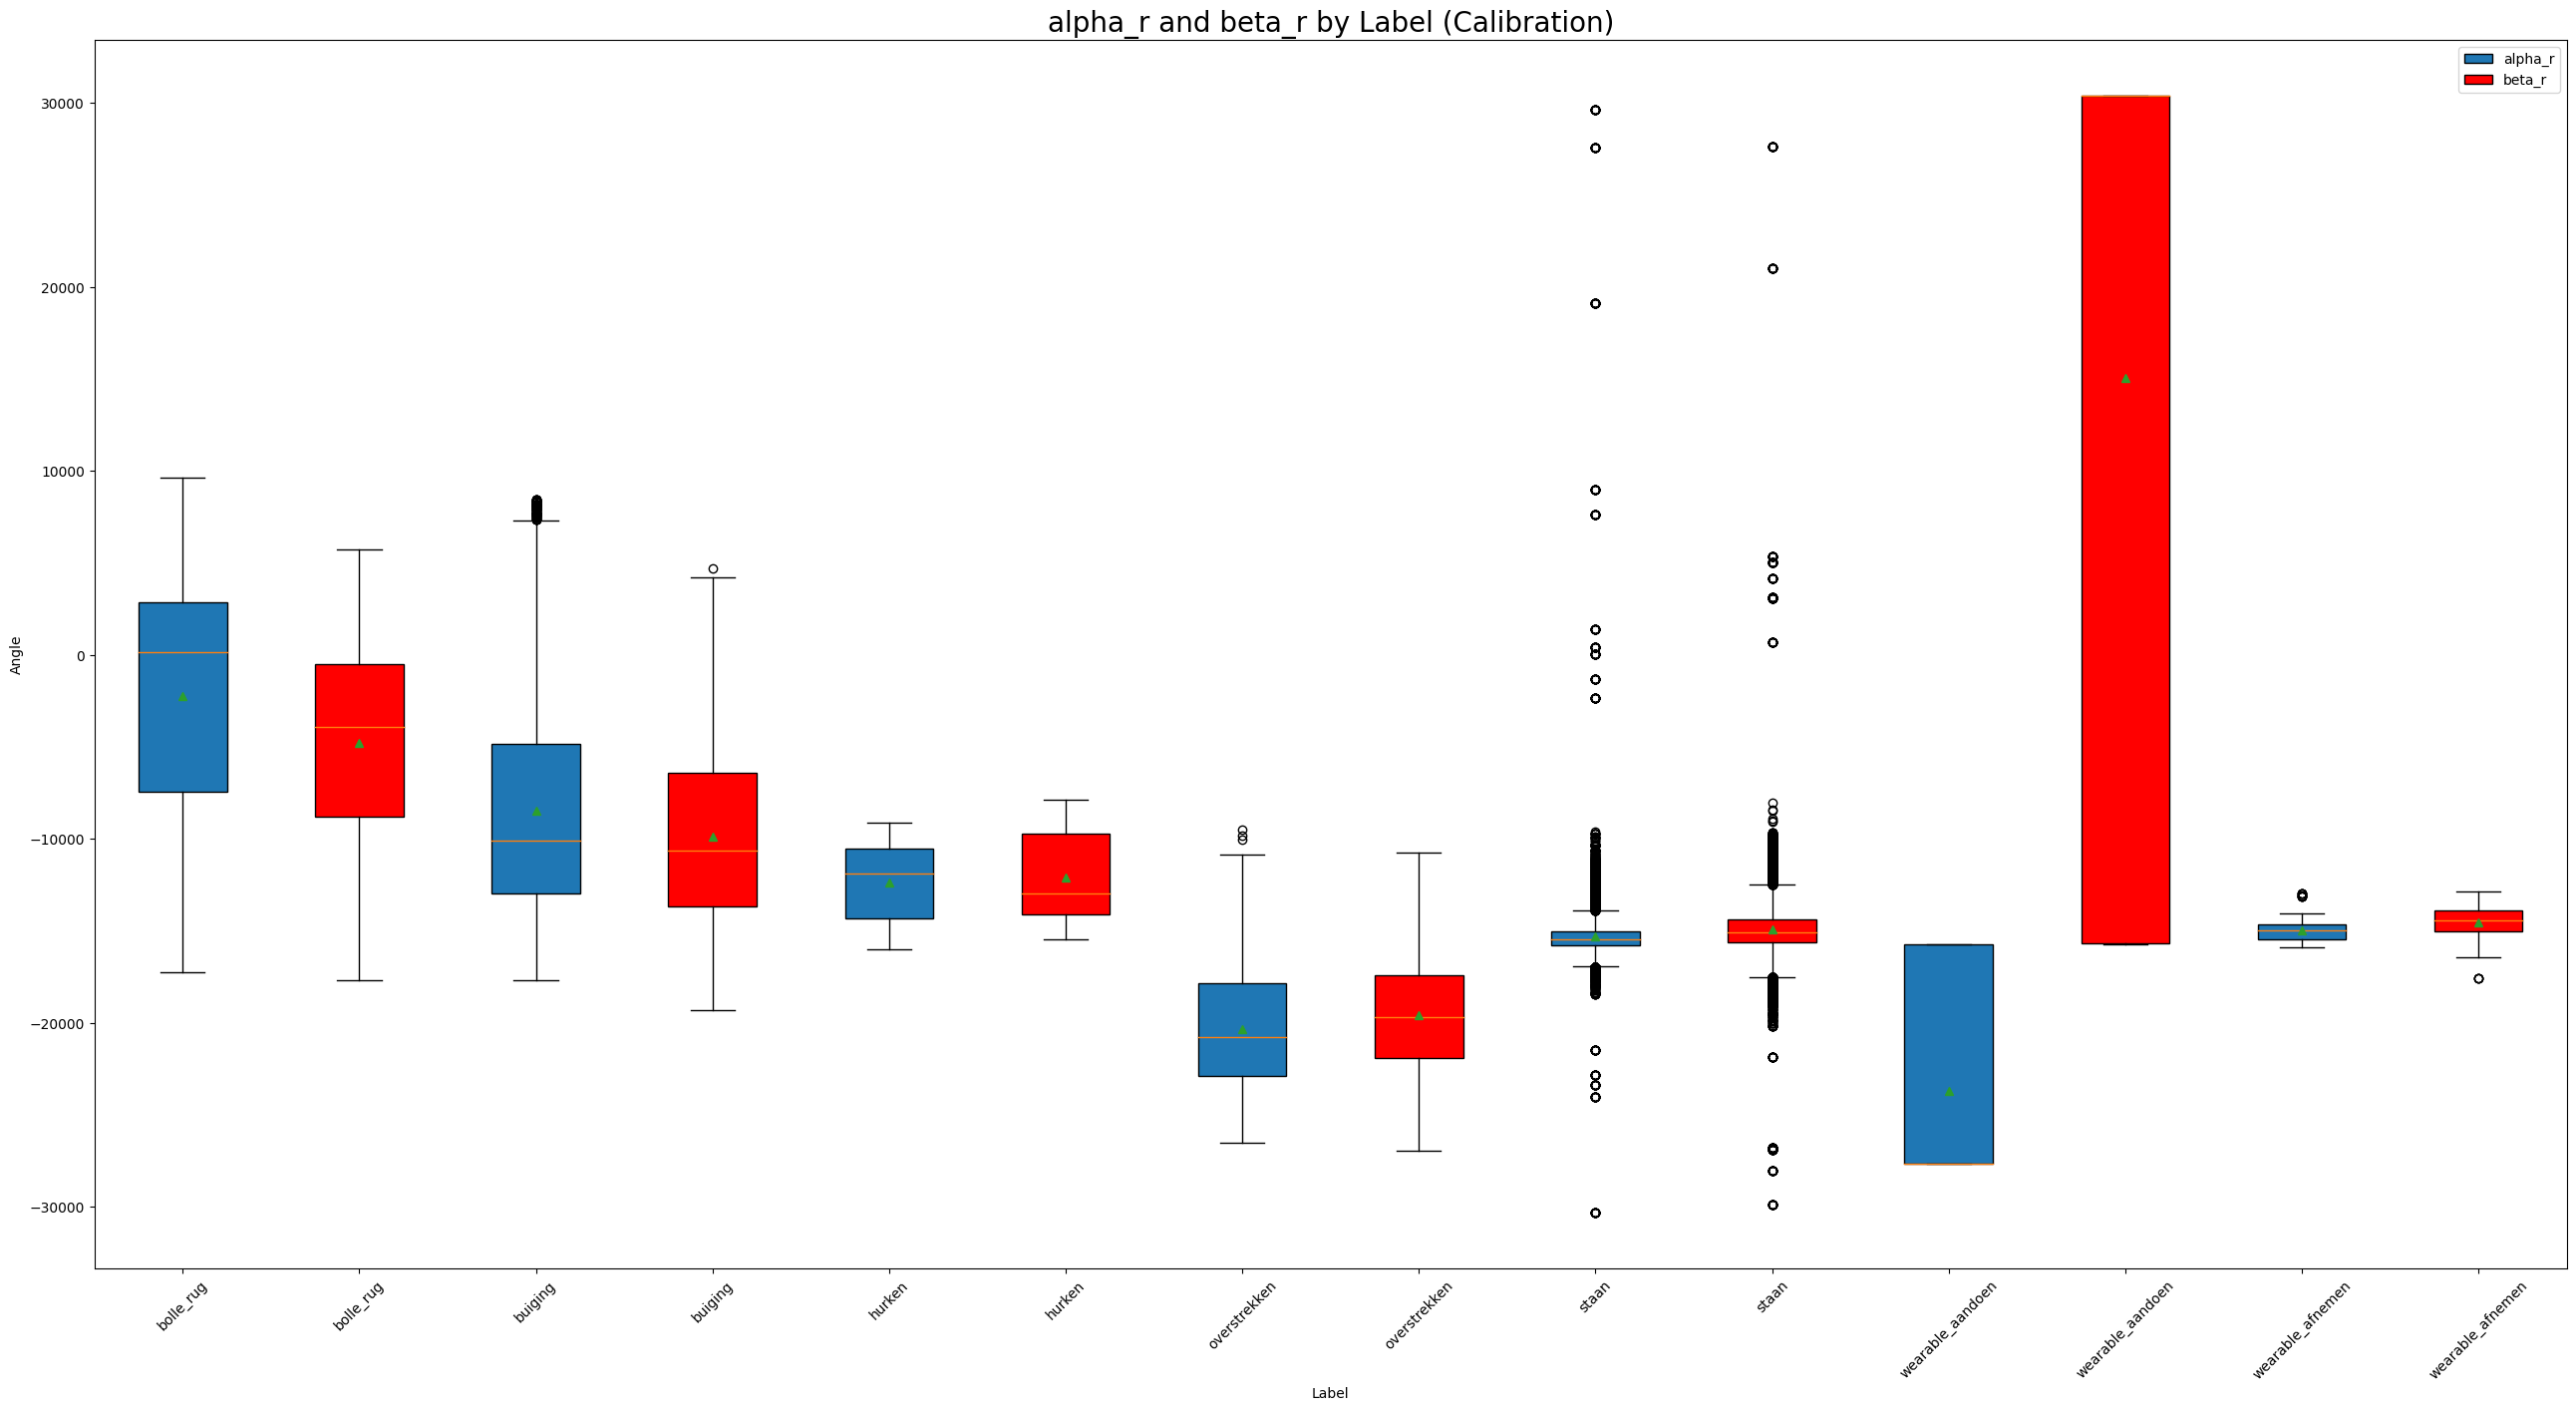

In [ ]:
### Box Plot of 'alpha_r' and 'beta_r' by 'label'

fig = plt.figure(figsize= (32, 16))
ax = fig.add_subplot(111)

ax.set_title("alpha_r and beta_r by Label (Calibration)", fontsize= 20)
ax.set

data = [df_analysis['alpha_r'][df_analysis['label'] == 'bolle_rug'],
        df_analysis['beta_r'][df_analysis['label'] == 'bolle_rug'],
        df_analysis['alpha_r'][df_analysis['label'] == 'buiging'],
        df_analysis['beta_r'][df_analysis['label'] == 'buiging'],
        df_analysis['alpha_r'][df_analysis['label'] == 'hurken'],
        df_analysis['beta_r'][df_analysis['label'] == 'hurken'],
        df_analysis['alpha_r'][df_analysis['label'] == 'overstrekken'],
        df_analysis['beta_r'][df_analysis['label'] == 'overstrekken'],
        df_analysis['alpha_r'][df_analysis['label'] == 'staan'],
        df_analysis['beta_r'][df_analysis['label'] == 'staan'],
        df_analysis['alpha_r'][df_analysis['label'] == 'wearable_aandoen'],
        df_analysis['beta_r'][df_analysis['label'] == 'wearable_aandoen'],
        df_analysis['alpha_r'][df_analysis['label'] == 'wearable_afnemen'],
        df_analysis['beta_r'][df_analysis['label'] == 'wearable_afnemen']]

bp = ax.boxplot(data,
           labels= ['bolle_rug', 'bolle_rug', 'buiging', 'buiging', 'hurken', 'hurken', 'overstrekken', 'overstrekken', 'staan', 'staan', 
           'wearable_aandoen', 'wearable_aandoen', 'wearable_afnemen', 'wearable_afnemen'],
           showmeans= True, patch_artist=True)

bp['boxes'][1].set_facecolor('red')
bp['boxes'][3].set_facecolor('red')
bp['boxes'][5].set_facecolor('red')
bp['boxes'][7].set_facecolor('red')
bp['boxes'][9].set_facecolor('red')
bp['boxes'][11].set_facecolor('red')
bp['boxes'][13].set_facecolor('red')

plt.xlabel("Label")
plt.xticks(rotation=45)
plt.ylabel("Angle")
plt.legend([bp['boxes'][0], bp['boxes'][1]], ['alpha_r', 'beta_r'])

plt.show()

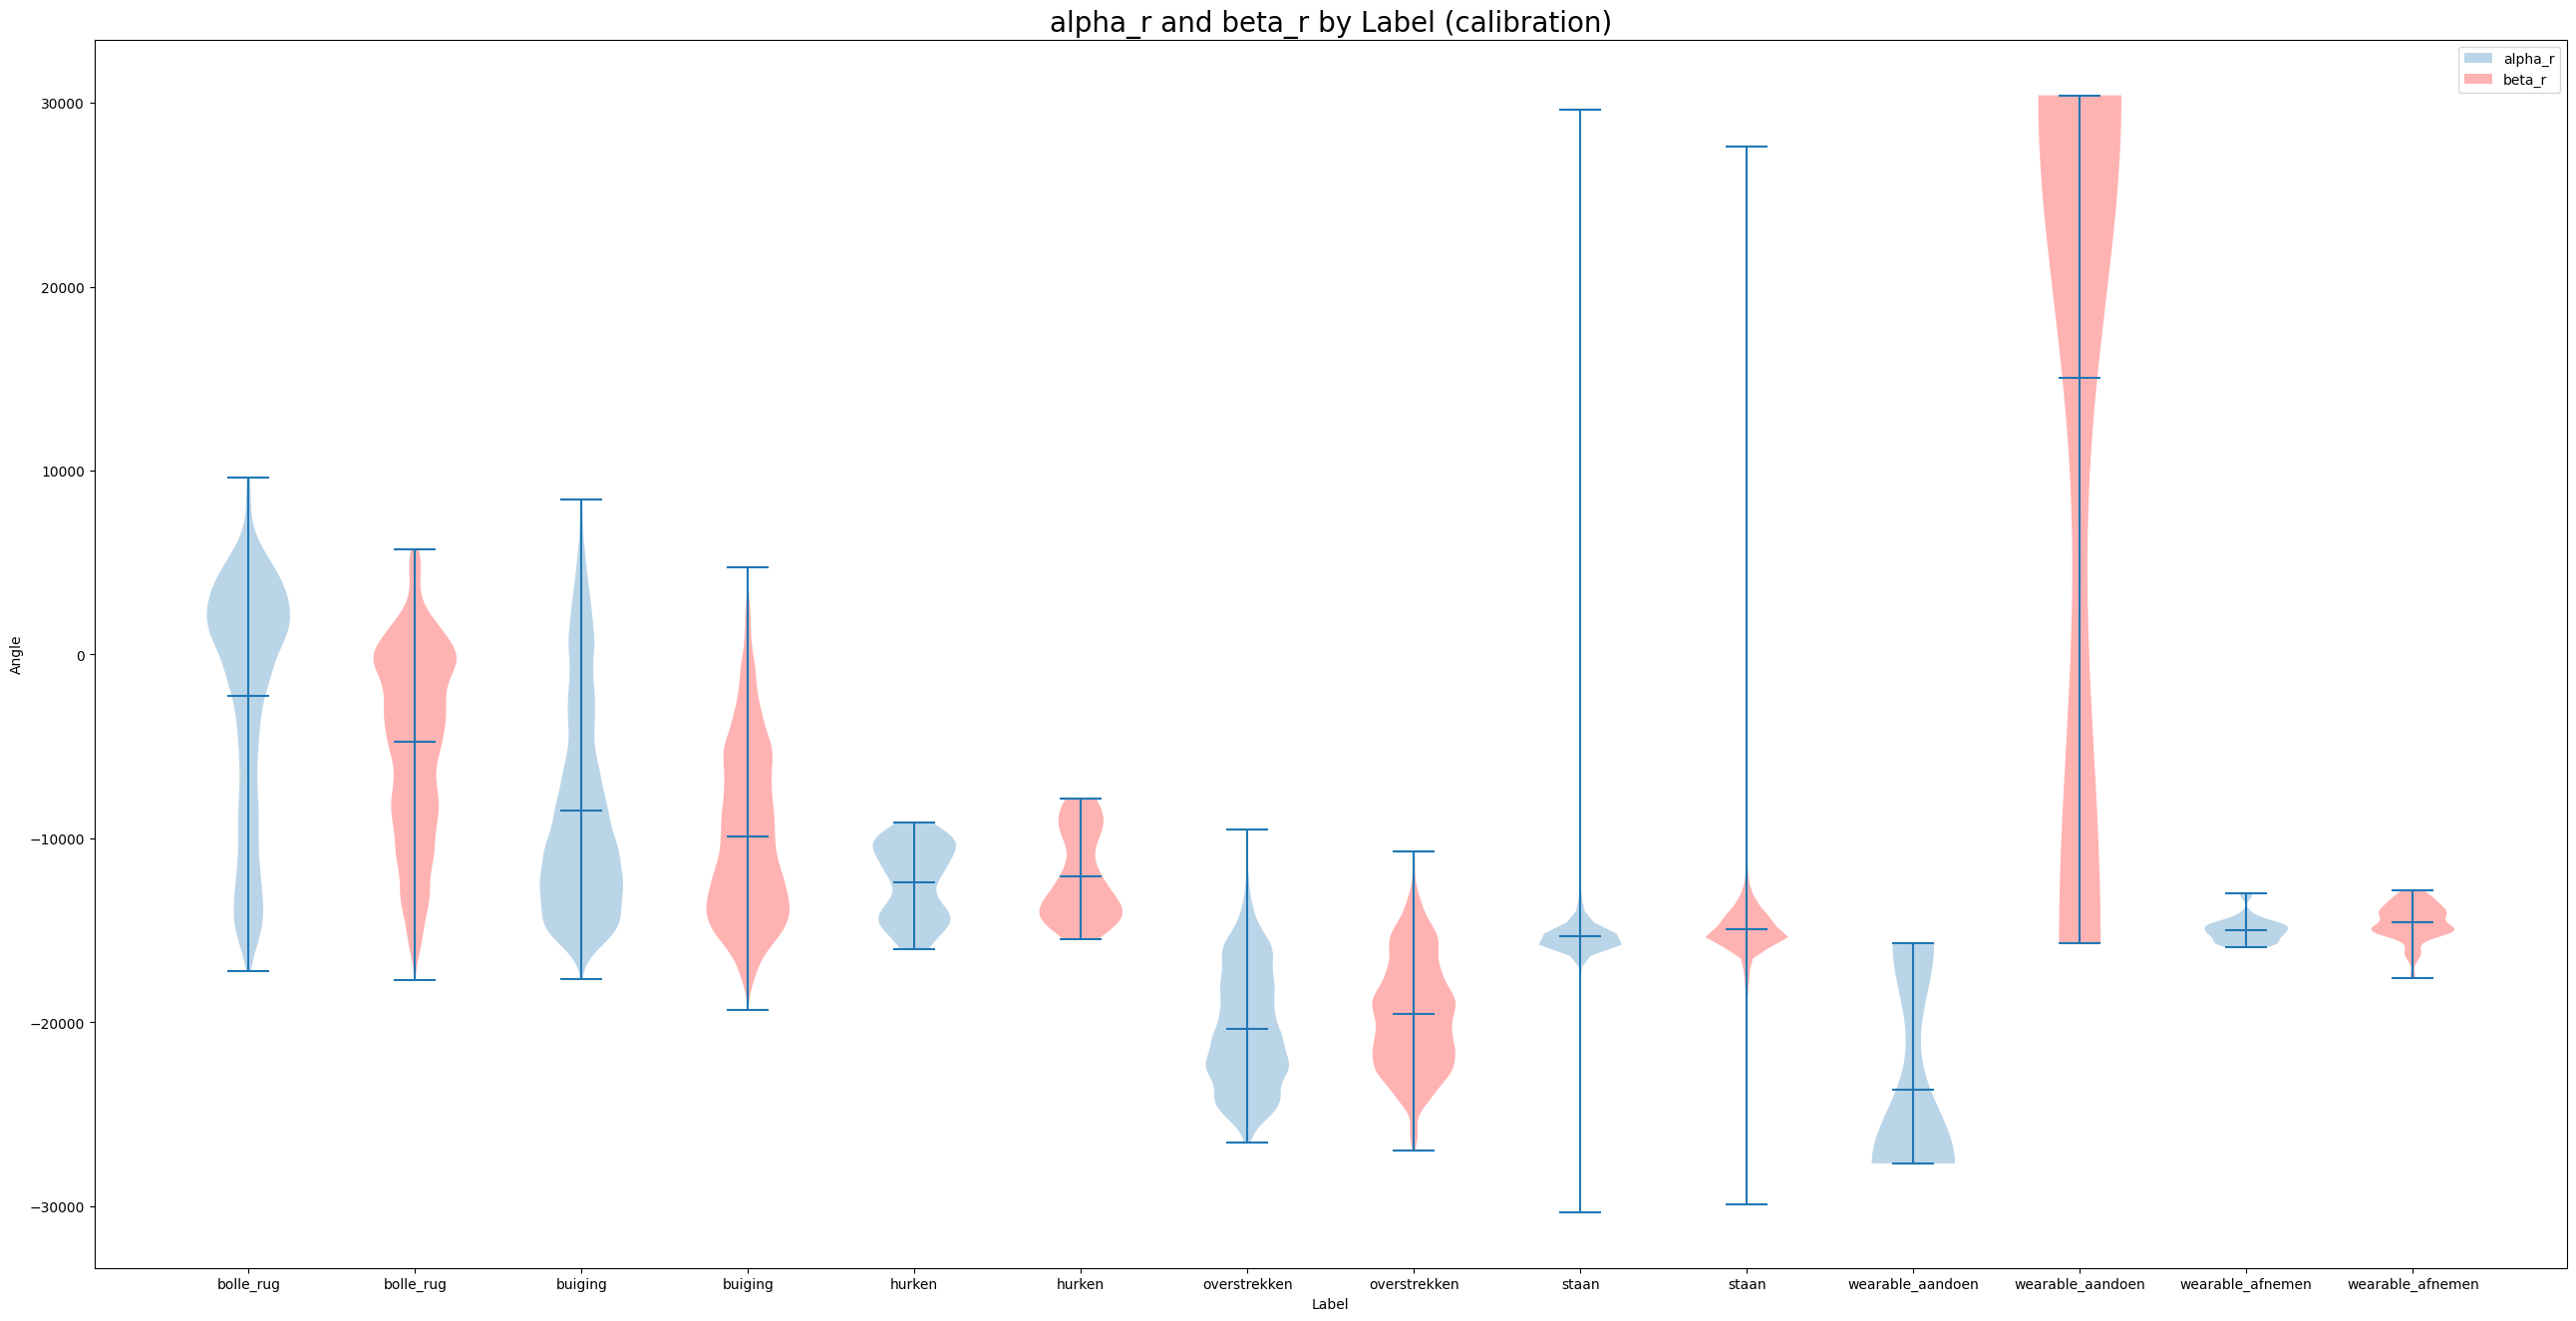

In [ ]:
### Violin Plot of 'alpha_r' and 'beta_r' by 'label'

data_to_violin = [df_analysis['alpha_r'][df_analysis['label'] == 'bolle_rug'],
                df_analysis['beta_r'][df_analysis['label'] == 'bolle_rug'],
                df_analysis['alpha_r'][df_analysis['label'] == 'buiging'],
                df_analysis['beta_r'][df_analysis['label'] == 'buiging'],
                df_analysis['alpha_r'][df_analysis['label'] == 'hurken'],
                df_analysis['beta_r'][df_analysis['label'] == 'hurken'],
                df_analysis['alpha_r'][df_analysis['label'] == 'overstrekken'],
                df_analysis['beta_r'][df_analysis['label'] == 'overstrekken'],
                df_analysis['alpha_r'][df_analysis['label'] == 'staan'],
                df_analysis['beta_r'][df_analysis['label'] == 'staan'],
                df_analysis['alpha_r'][df_analysis['label'] == 'wearable_aandoen'],
                df_analysis['beta_r'][df_analysis['label'] == 'wearable_aandoen'],
                df_analysis['alpha_r'][df_analysis['label'] == 'wearable_afnemen'],
                df_analysis['beta_r'][df_analysis['label'] == 'wearable_afnemen']]

fig = plt.figure(figsize=(32, 16))
ax = fig.add_subplot(111)

x_pos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
x_labels = ['bolle_rug', 'bolle_rug', 'buiging', 'buiging', 'hurken', 'hurken', 'overstrekken', 'overstrekken', 'staan', 'staan', 
            'wearable_aandoen', 'wearable_aandoen', 'wearable_afnemen', 'wearable_afnemen']

vp = ax.violinplot(data_to_violin, showmeans=True, showextrema=True)

vp['bodies'][1].set_facecolor('red')
vp['bodies'][3].set_facecolor('red')
vp['bodies'][5].set_facecolor('red')
vp['bodies'][7].set_facecolor('red')
vp['bodies'][9].set_facecolor('red')
vp['bodies'][11].set_facecolor('red')
vp['bodies'][13].set_facecolor('red')

plt.title('alpha_r and beta_r by Label (calibration)', fontsize=20)
plt.xlabel('Label')
plt.ylabel('Angle')
plt.xticks(x_pos, x_labels)
plt.legend([vp['bodies'][0], vp['bodies'][1]], ['alpha_r', 'beta_r'])
plt.show()

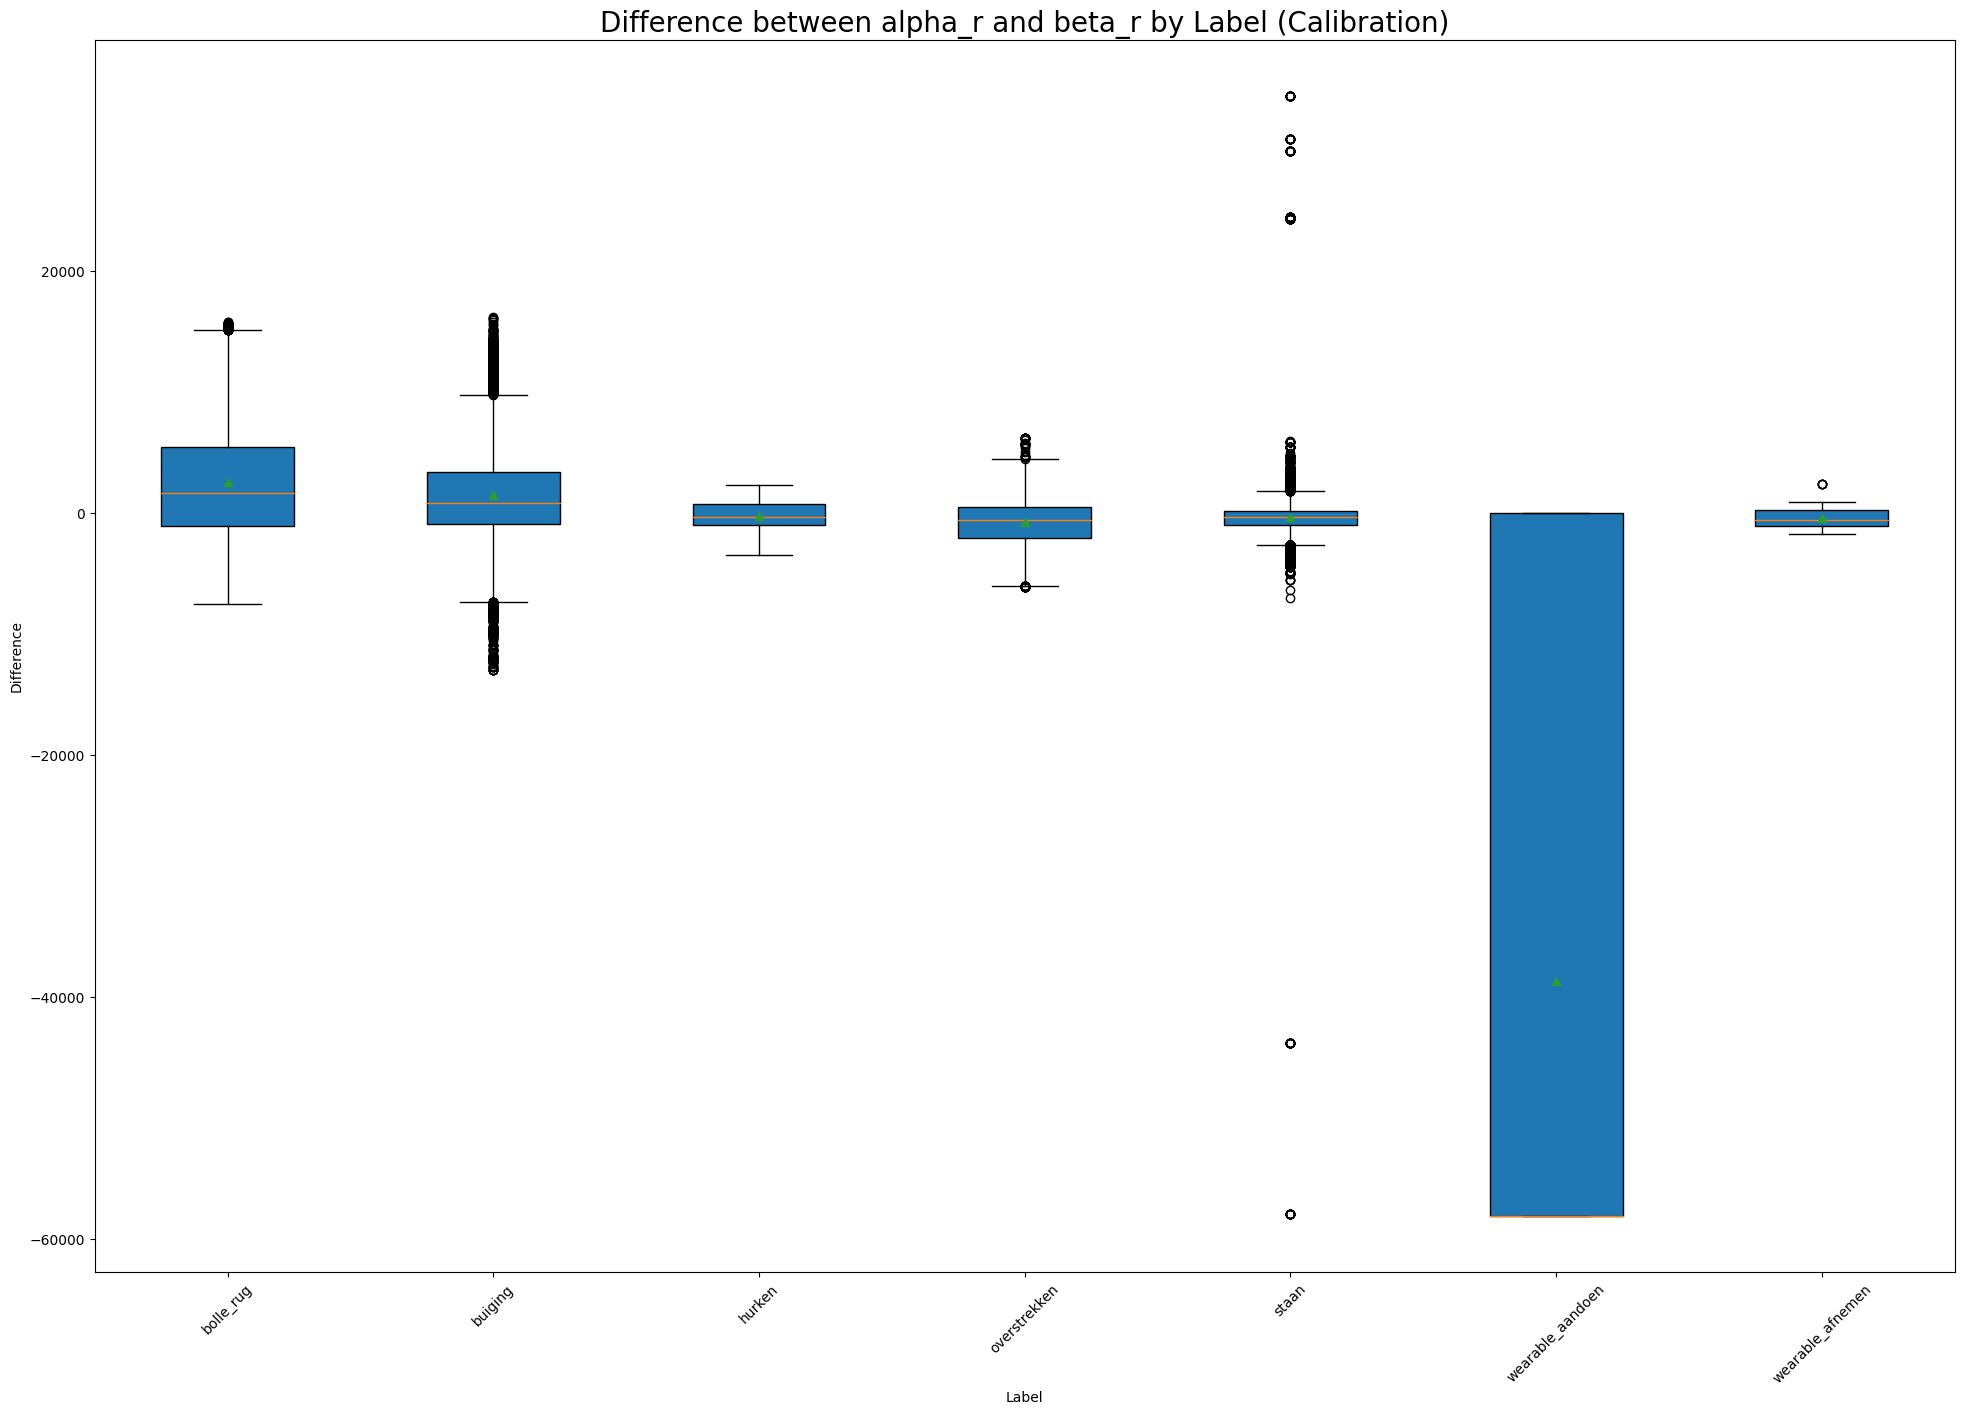

In [ ]:
### Box Plot of difference between 'alpha_r' and 'beta_r' by 'label'

fig = plt.figure(figsize= (24, 16))
ax = fig.add_subplot(111)

ax.set_title("Difference between alpha_r and beta_r by Label (Calibration)", fontsize= 20)
ax.set

data = [df_analysis['ab_r_diff'][df_analysis['label'] == 'bolle_rug'],
        df_analysis['ab_r_diff'][df_analysis['label'] == 'buiging'],
        df_analysis['ab_r_diff'][df_analysis['label'] == 'hurken'],
        df_analysis['ab_r_diff'][df_analysis['label'] == 'overstrekken'],
        df_analysis['ab_r_diff'][df_analysis['label'] == 'staan'],
        df_analysis['ab_r_diff'][df_analysis['label'] == 'wearable_aandoen'],
        df_analysis['ab_r_diff'][df_analysis['label'] == 'wearable_afnemen']]

bp = ax.boxplot(data,
           labels= ['bolle_rug', 'buiging', 'hurken', 'overstrekken', 'staan', 'wearable_aandoen', 'wearable_afnemen'],
           showmeans= True, patch_artist=True)

plt.xlabel("Label")
plt.xticks(rotation=45)
plt.ylabel("Difference")

plt.show()

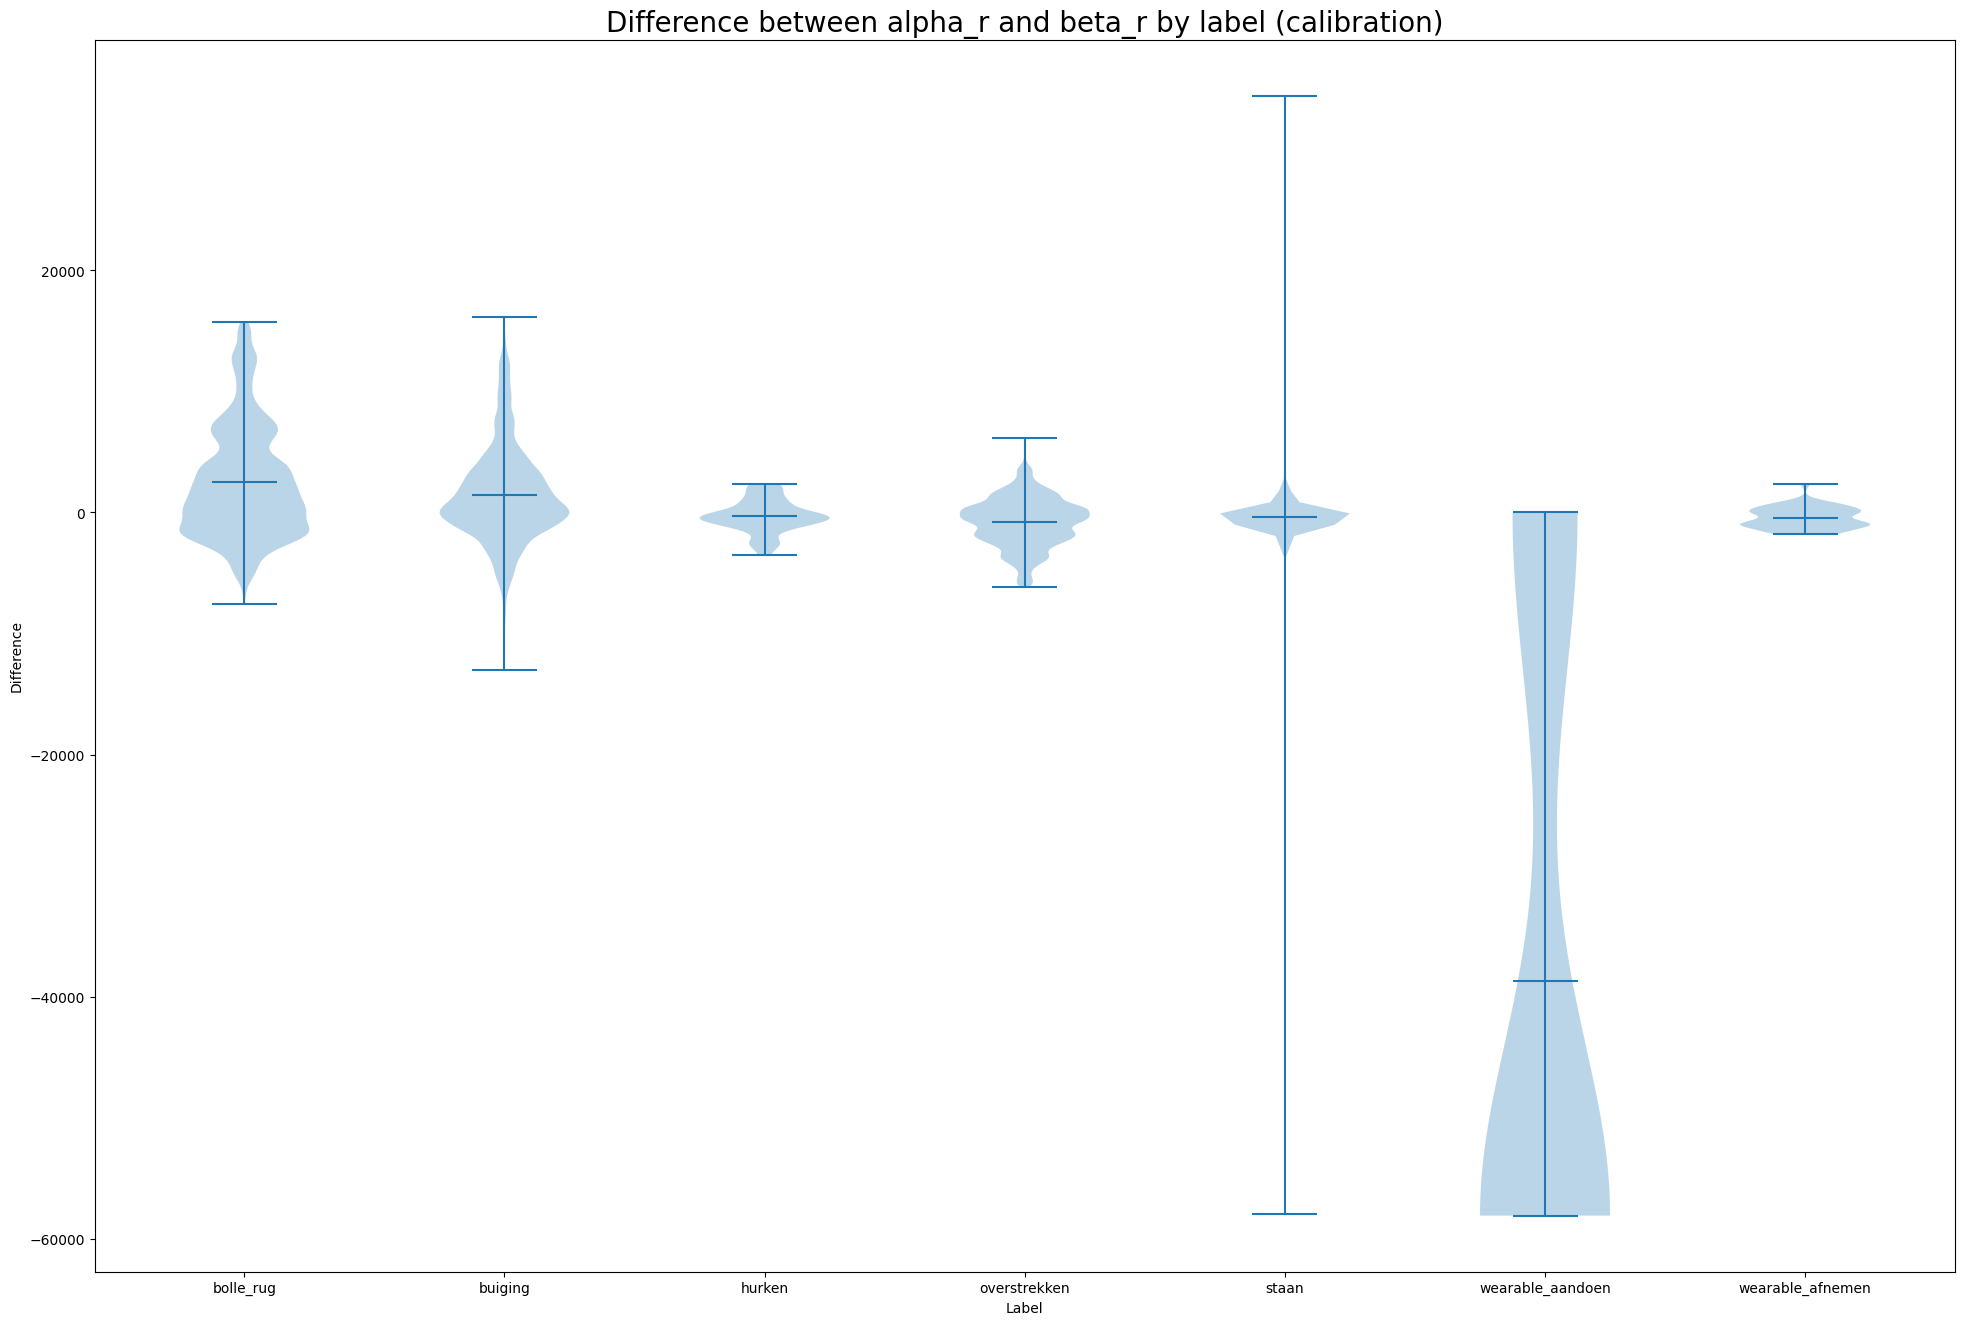

In [ ]:
### Violin plot of difference between 'alpha_r' and 'beta_r' by 'label'

data_to_violin = [df_analysis['ab_r_diff'][df_analysis['label'] == 'bolle_rug'],
                df_analysis['ab_r_diff'][df_analysis['label'] == 'buiging'],
                df_analysis['ab_r_diff'][df_analysis['label'] == 'hurken'],
                df_analysis['ab_r_diff'][df_analysis['label'] == 'overstrekken'],
                df_analysis['ab_r_diff'][df_analysis['label'] == 'staan'],
                df_analysis['ab_r_diff'][df_analysis['label'] == 'wearable_aandoen'],
                df_analysis['ab_r_diff'][df_analysis['label'] == 'wearable_afnemen']]

fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(111)

x_pos = [1, 2, 3, 4, 5, 6, 7]
x_labels = ['bolle_rug', 'buiging', 'hurken', 'overstrekken', 'staan', 'wearable_aandoen', 'wearable_afnemen']

vp = ax.violinplot(data_to_violin, showmeans=True, showextrema=True)

plt.title('Difference between alpha_r and beta_r by label (calibration)', fontsize=20)
plt.xlabel('Label')
plt.ylabel('Difference')
plt.xticks(x_pos, x_labels)

plt.show()

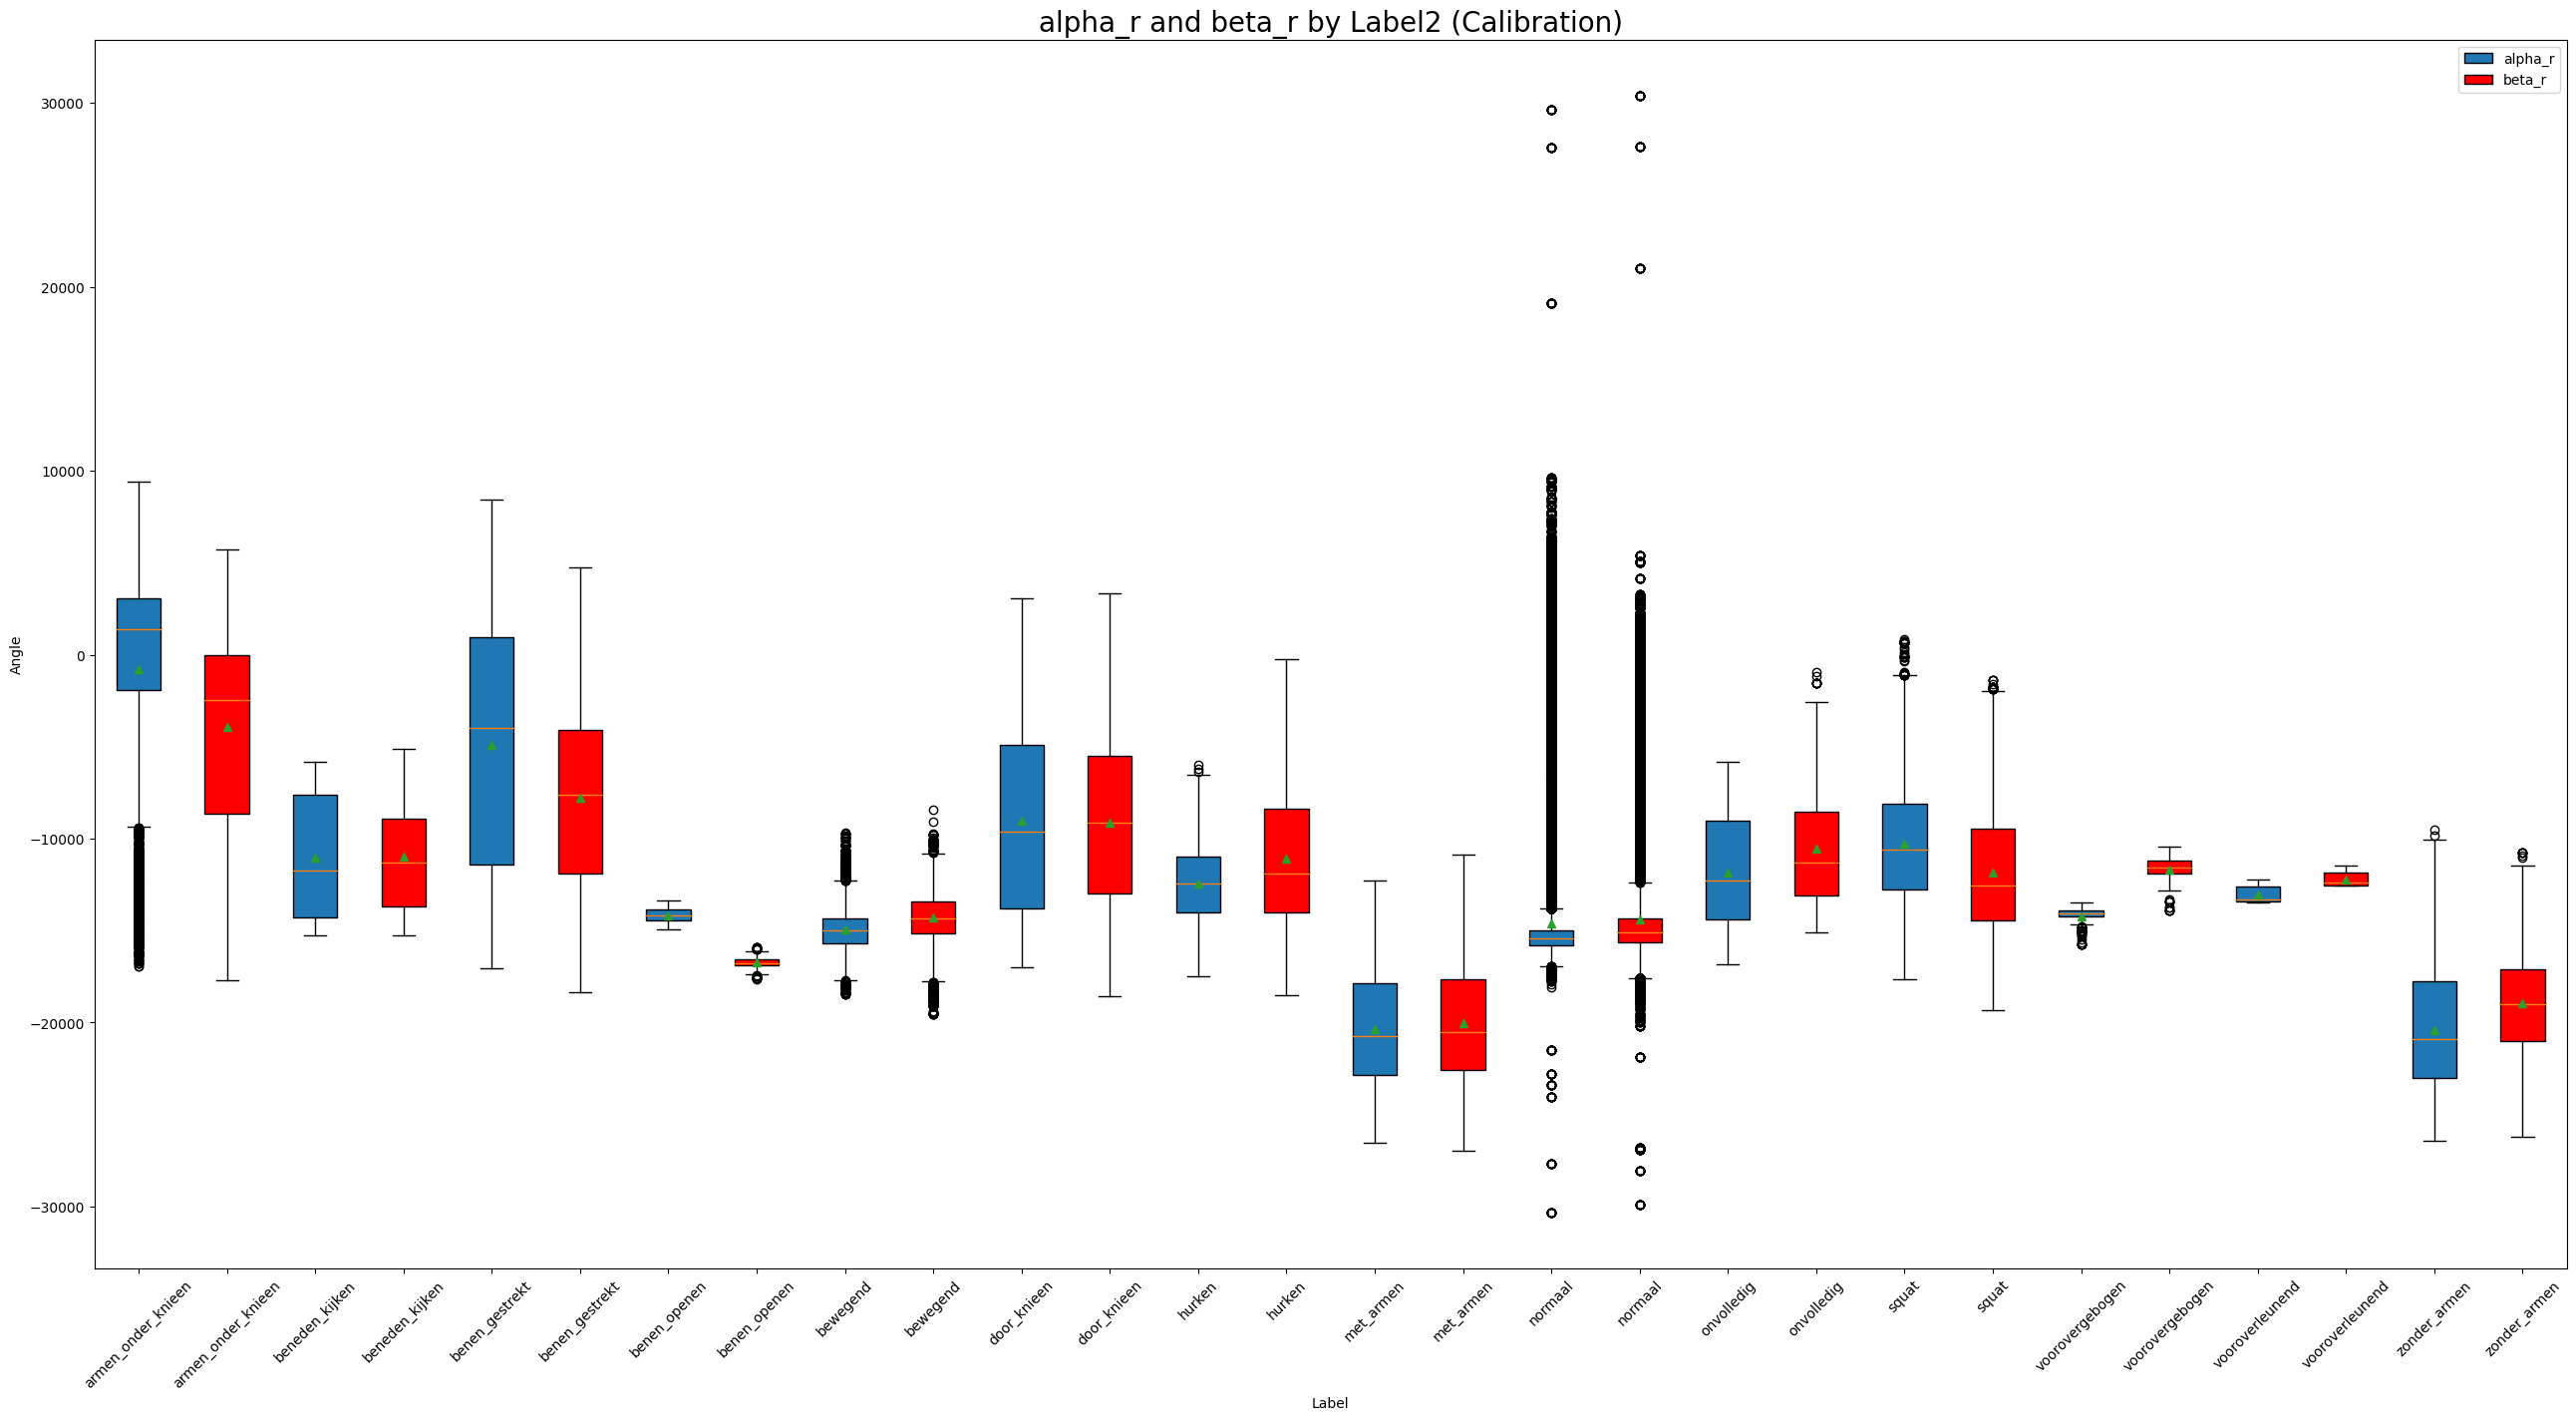

In [ ]:
### Box Plot of 'alpha_r' and 'beta_r' by 'label2'

fig = plt.figure(figsize= (32, 16))
ax = fig.add_subplot(111)

ax.set_title("alpha_r and beta_r by Label2 (Calibration)", fontsize= 20)
ax.set

data = [df_analysis['alpha_r'][df_analysis['label2'] == 'armen_onder_knieen'],
        df_analysis['beta_r'][df_analysis['label2'] == 'armen_onder_knieen'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'beneden_kijken'],
        df_analysis['beta_r'][df_analysis['label2'] == 'beneden_kijken'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'benen_gestrekt'],
        df_analysis['beta_r'][df_analysis['label2'] == 'benen_gestrekt'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'benen_openen'],
        df_analysis['beta_r'][df_analysis['label2'] == 'benen_openen'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'bewegend'],
        df_analysis['beta_r'][df_analysis['label2'] == 'bewegend'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'door_knieen'],
        df_analysis['beta_r'][df_analysis['label2'] == 'door_knieen'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'hurken'],
        df_analysis['beta_r'][df_analysis['label2'] == 'hurken'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'met_armen'],
        df_analysis['beta_r'][df_analysis['label2'] == 'met_armen'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'normaal'],
        df_analysis['beta_r'][df_analysis['label2'] == 'normaal'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'onvolledig'],
        df_analysis['beta_r'][df_analysis['label2'] == 'onvolledig'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'squat'],
        df_analysis['beta_r'][df_analysis['label2'] == 'squat'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'voorovergebogen'],
        df_analysis['beta_r'][df_analysis['label2'] == 'voorovergebogen'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'vooroverleunend'],
        df_analysis['beta_r'][df_analysis['label2'] == 'vooroverleunend'],
        df_analysis['alpha_r'][df_analysis['label2'] == 'zonder_armen'],
        df_analysis['beta_r'][df_analysis['label2'] == 'zonder_armen']]

bp = ax.boxplot(data,
           labels= ['armen_onder_knieen', 'armen_onder_knieen', 'beneden_kijken', 'beneden_kijken', 'benen_gestrekt', 'benen_gestrekt', 
           'benen_openen', 'benen_openen', 'bewegend', 'bewegend', 'door_knieen', 'door_knieen', 'hurken', 'hurken', 'met_armen', 'met_armen', 
           'normaal', 'normaal', 'onvolledig', 'onvolledig', 'squat', 'squat', 'voorovergebogen', 'voorovergebogen', 
           'vooroverleunend', 'vooroverleunend', 'zonder_armen', 'zonder_armen'],
           showmeans= True, patch_artist=True)

bp['boxes'][1].set_facecolor('red')
bp['boxes'][3].set_facecolor('red')
bp['boxes'][5].set_facecolor('red')
bp['boxes'][7].set_facecolor('red')
bp['boxes'][9].set_facecolor('red')
bp['boxes'][11].set_facecolor('red')
bp['boxes'][13].set_facecolor('red')
bp['boxes'][15].set_facecolor('red')
bp['boxes'][17].set_facecolor('red')
bp['boxes'][19].set_facecolor('red')
bp['boxes'][21].set_facecolor('red')
bp['boxes'][23].set_facecolor('red')
bp['boxes'][25].set_facecolor('red')
bp['boxes'][27].set_facecolor('red')

plt.xlabel("Label")
plt.xticks(rotation=45)
plt.ylabel("Angle")
plt.legend([bp['boxes'][0], bp['boxes'][1]], ['alpha_r', 'beta_r'])

plt.show()

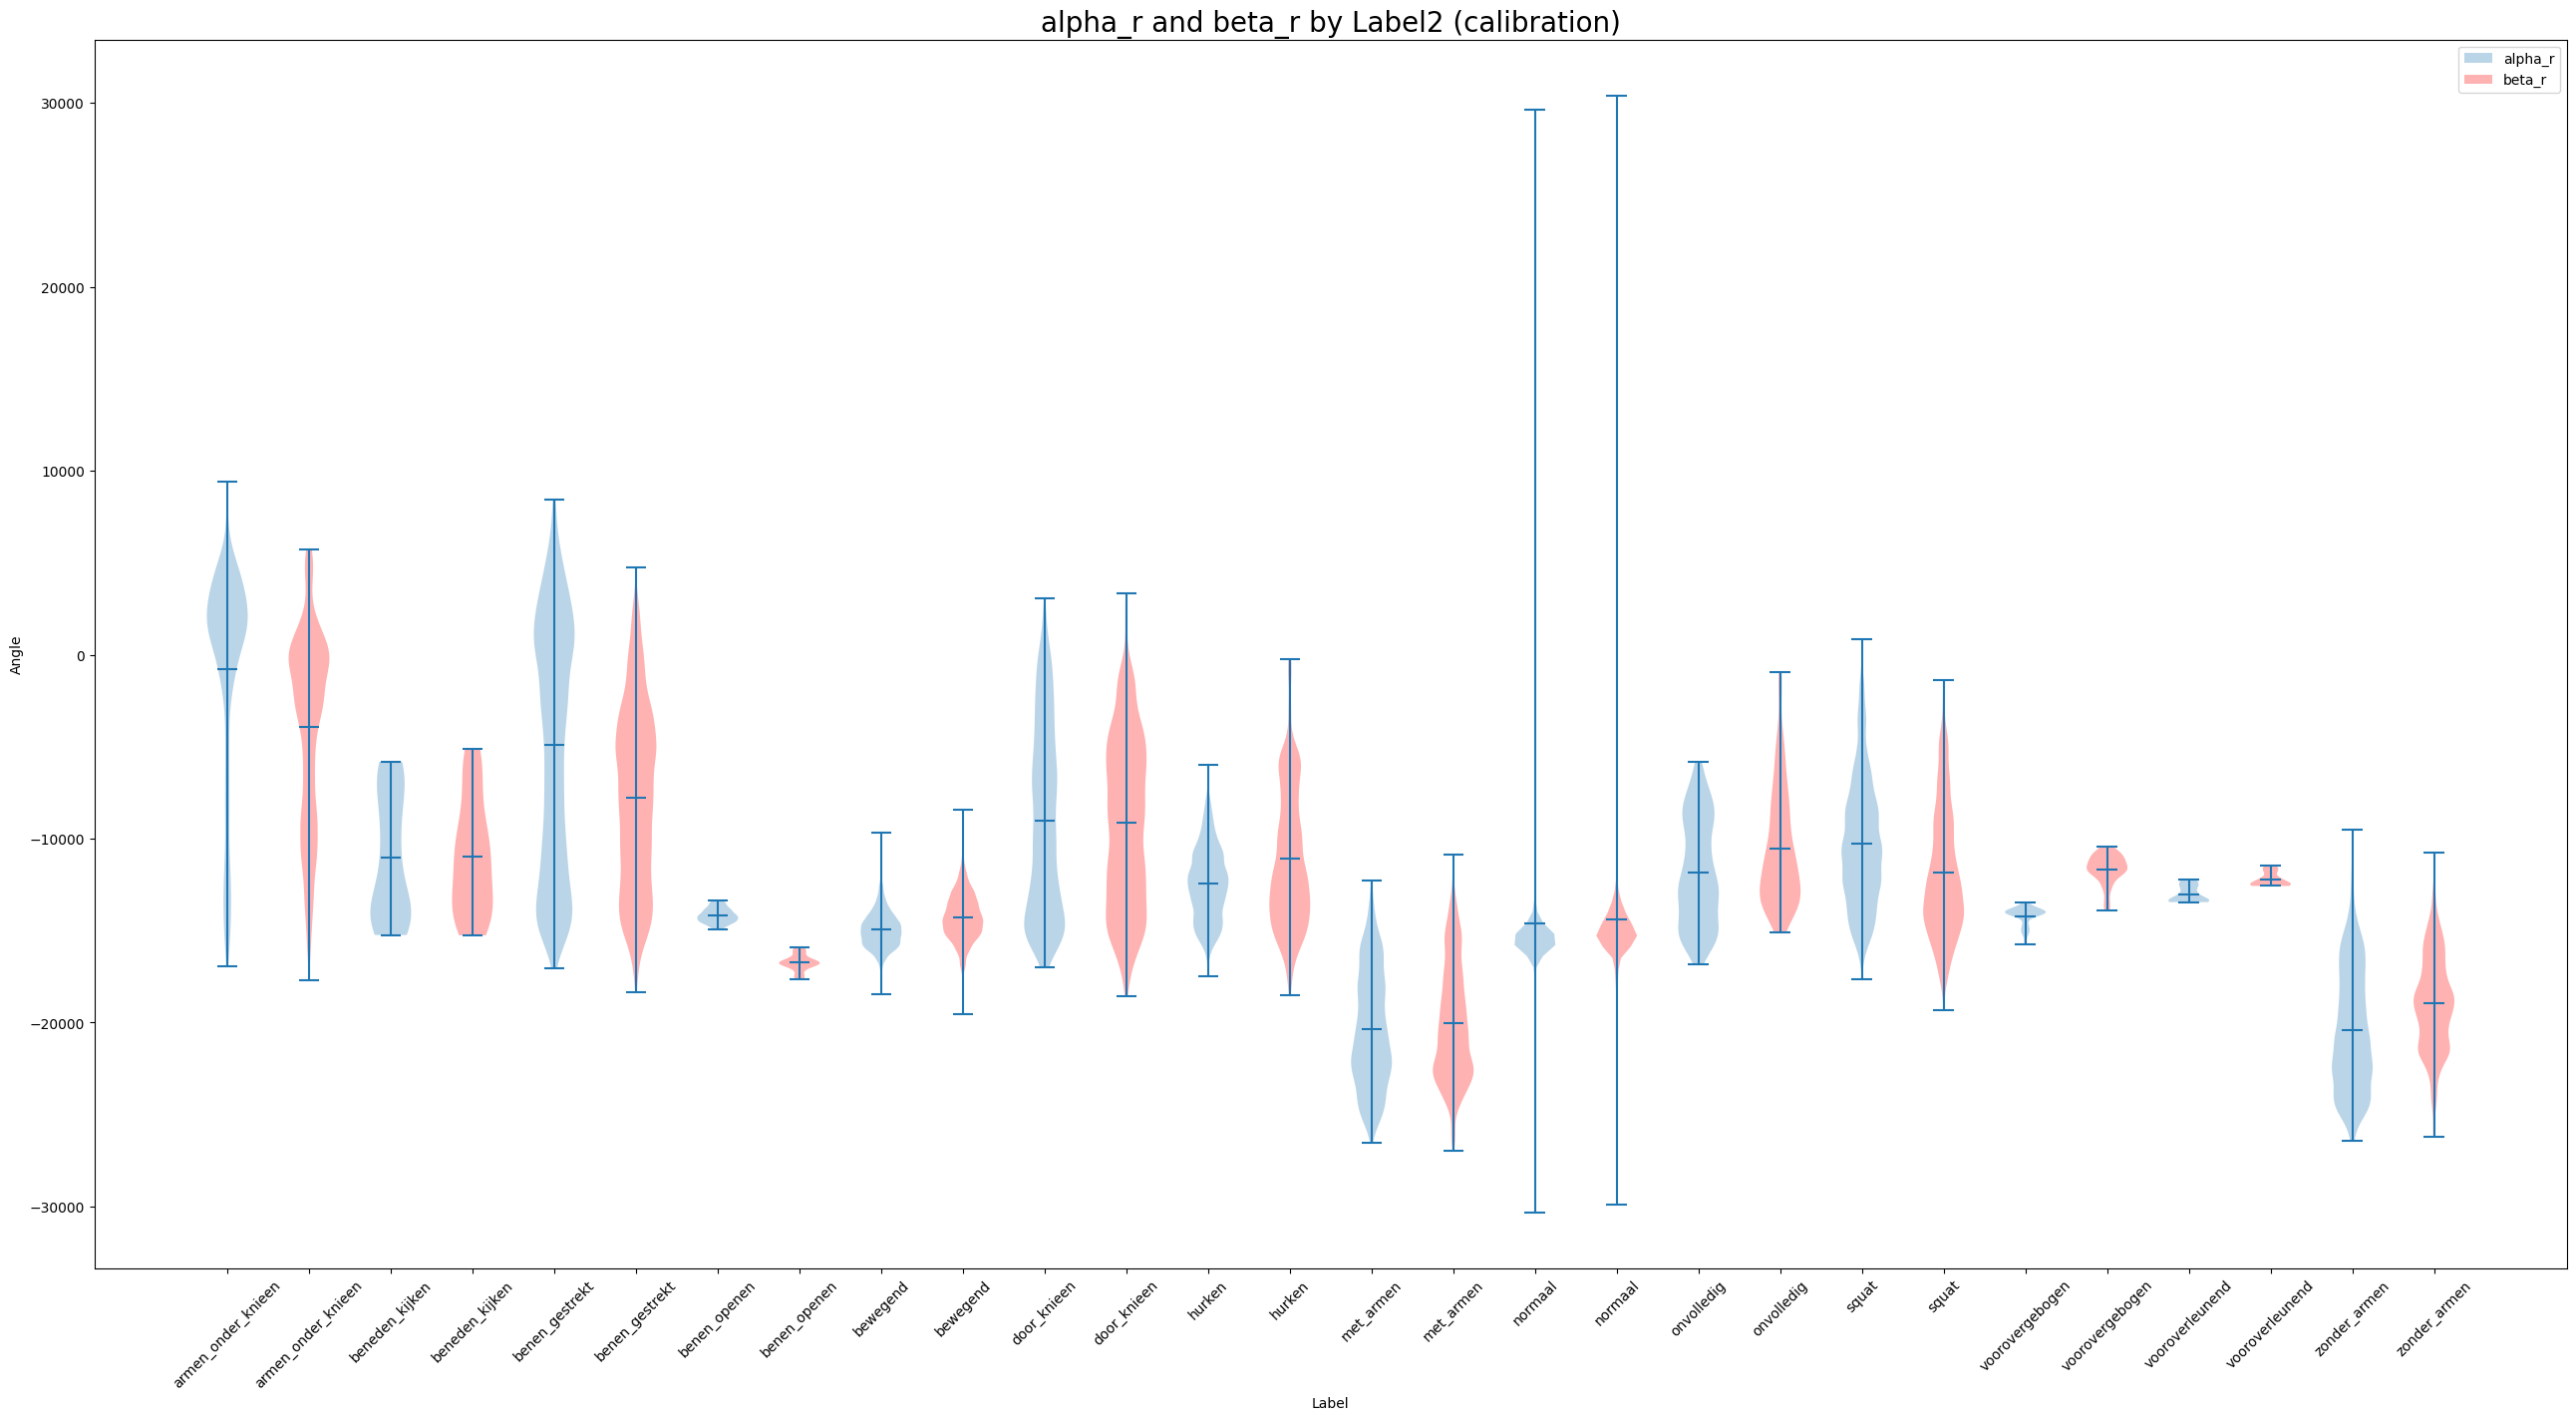

In [ ]:
### Violin Plot of 'alpha_r' and 'beta_r' by 'label2'

data_to_violin = [df_analysis['alpha_r'][df_analysis['label2'] == 'armen_onder_knieen'],
                df_analysis['beta_r'][df_analysis['label2'] == 'armen_onder_knieen'],
                df_analysis['alpha_r'][df_analysis['label2'] == 'beneden_kijken'],
                df_analysis['beta_r'][df_analysis['label2'] == 'beneden_kijken'],
                df_analysis['alpha_r'][df_analysis['label2'] == 'benen_gestrekt'],
                df_analysis['beta_r'][df_analysis['label2'] == 'benen_gestrekt'],
                df_analysis['alpha_r'][df_analysis['label2'] == 'benen_openen'],
                df_analysis['beta_r'][df_analysis['label2'] == 'benen_openen'],
                df_analysis['alpha_r'][df_analysis['label2'] == 'bewegend'],
                df_analysis['beta_r'][df_analysis['label2'] == 'bewegend'],
                df_analysis['alpha_r'][df_analysis['label2'] == 'door_knieen'],
                df_analysis['beta_r'][df_analysis['label2'] == 'door_knieen'],
                df_analysis['alpha_r'][df_analysis['label2'] == 'hurken'],
                df_analysis['beta_r'][df_analysis['label2'] == 'hurken'],
                df_analysis['alpha_r'][df_analysis['label2'] == 'met_armen'],
                df_analysis['beta_r'][df_analysis['label2'] == 'met_armen'],
                df_analysis['alpha_r'][df_analysis['label2'] == 'normaal'],
                df_analysis['beta_r'][df_analysis['label2'] == 'normaal'],
                df_analysis['alpha_r'][df_analysis['label2'] == 'onvolledig'],
                df_analysis['beta_r'][df_analysis['label2'] == 'onvolledig'],
                df_analysis['alpha_r'][df_analysis['label2'] == 'squat'],
                df_analysis['beta_r'][df_analysis['label2'] == 'squat'],
                df_analysis['alpha_r'][df_analysis['label2'] == 'voorovergebogen'],
                df_analysis['beta_r'][df_analysis['label2'] == 'voorovergebogen'],
                df_analysis['alpha_r'][df_analysis['label2'] == 'vooroverleunend'],
                df_analysis['beta_r'][df_analysis['label2'] == 'vooroverleunend'],
                df_analysis['alpha_r'][df_analysis['label2'] == 'zonder_armen'],
                df_analysis['beta_r'][df_analysis['label2'] == 'zonder_armen']]

fig = plt.figure(figsize=(32, 16))
ax = fig.add_subplot(111)

x_pos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
x_labels = ['armen_onder_knieen', 'armen_onder_knieen', 'beneden_kijken', 'beneden_kijken', 'benen_gestrekt', 'benen_gestrekt', 
           'benen_openen', 'benen_openen', 'bewegend', 'bewegend', 'door_knieen', 'door_knieen', 'hurken', 'hurken', 'met_armen', 'met_armen', 
           'normaal', 'normaal', 'onvolledig', 'onvolledig', 'squat', 'squat', 'voorovergebogen', 'voorovergebogen', 
           'vooroverleunend', 'vooroverleunend', 'zonder_armen', 'zonder_armen']

vp = ax.violinplot(data_to_violin, showmeans=True, showextrema=True)

vp['bodies'][1].set_facecolor('red')
vp['bodies'][3].set_facecolor('red')
vp['bodies'][5].set_facecolor('red')
vp['bodies'][7].set_facecolor('red')
vp['bodies'][9].set_facecolor('red')
vp['bodies'][11].set_facecolor('red')
vp['bodies'][13].set_facecolor('red')
vp['bodies'][15].set_facecolor('red')
vp['bodies'][17].set_facecolor('red')
vp['bodies'][19].set_facecolor('red')
vp['bodies'][21].set_facecolor('red')
vp['bodies'][23].set_facecolor('red')
vp['bodies'][25].set_facecolor('red')
vp['bodies'][27].set_facecolor('red')

plt.title('alpha_r and beta_r by Label2 (calibration)', fontsize=20)
plt.xlabel('Label')
plt.ylabel('Angle')
plt.xticks(x_pos, x_labels, rotation=45)
plt.legend([vp['bodies'][0], vp['bodies'][1]], ['alpha_r', 'beta_r'])
plt.show()

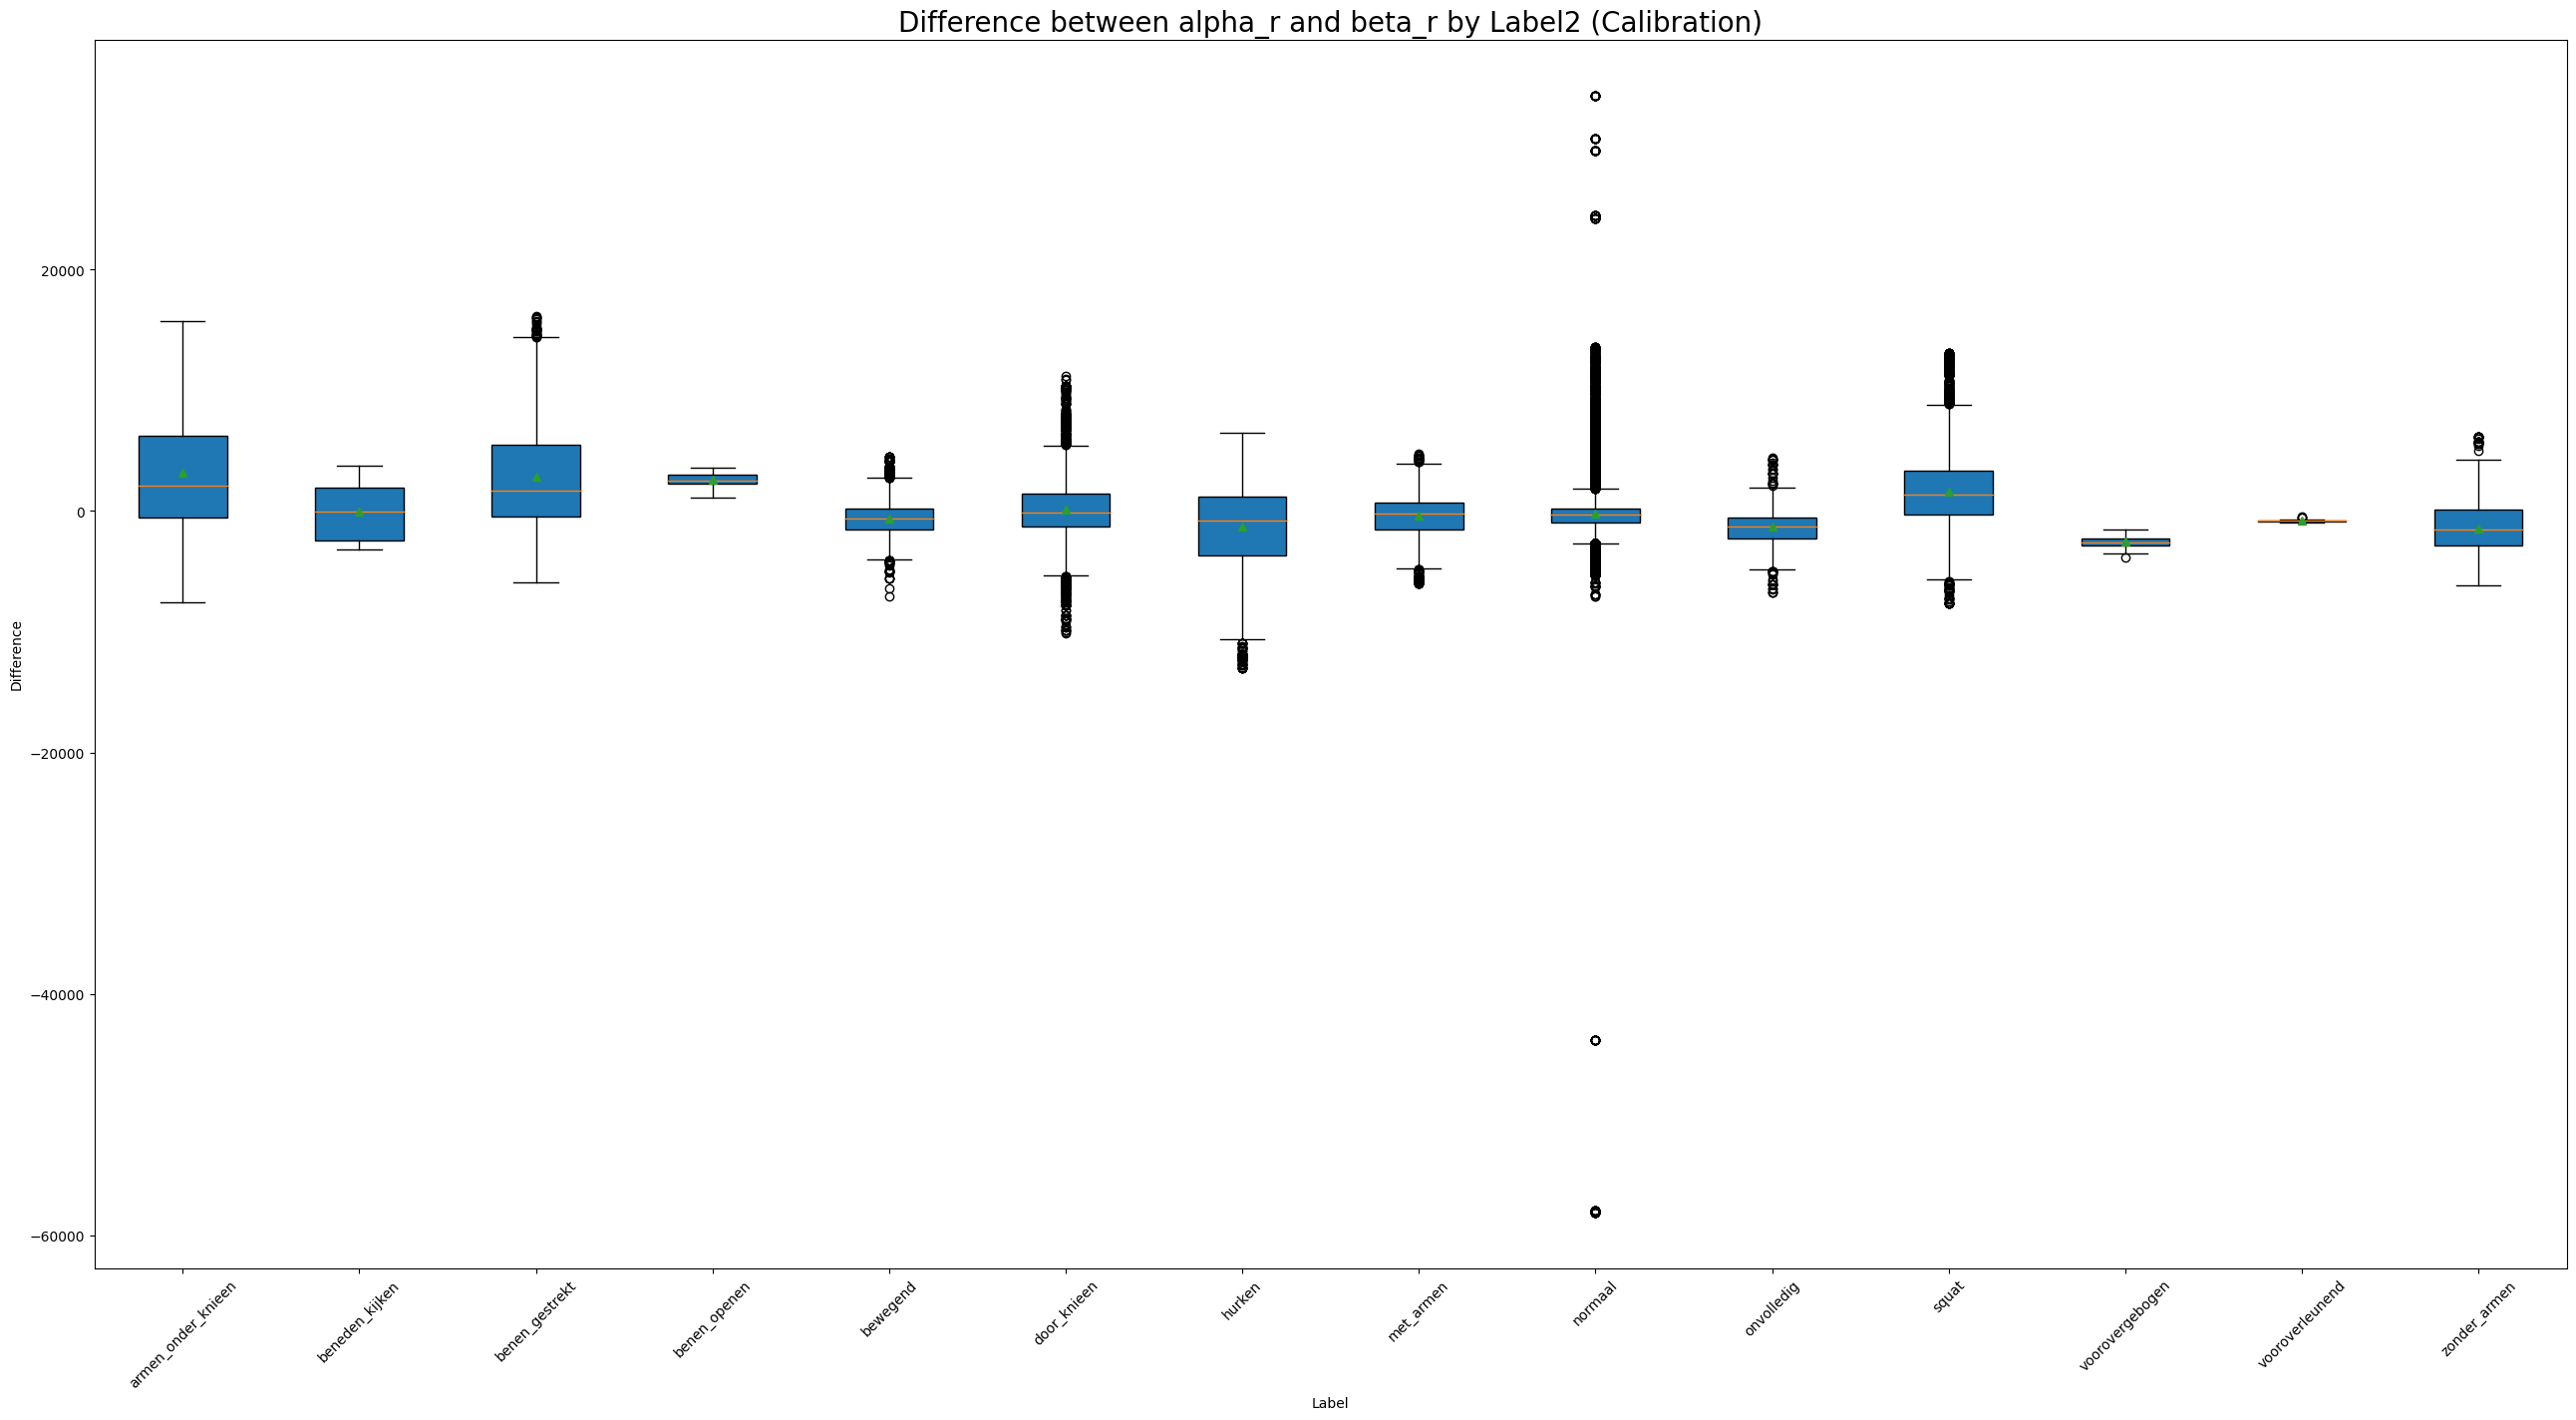

In [ ]:
### Box Plot of difference between 'alpha_r' and 'beta_r' by 'label2'

fig = plt.figure(figsize= (32, 16))
ax = fig.add_subplot(111)

ax.set_title("Difference between alpha_r and beta_r by Label2 (Calibration)", fontsize= 20)
ax.set

data = [df_analysis['ab_r_diff'][df_analysis['label2'] == 'armen_onder_knieen'],
        df_analysis['ab_r_diff'][df_analysis['label2'] == 'beneden_kijken'],
        df_analysis['ab_r_diff'][df_analysis['label2'] == 'benen_gestrekt'],
        df_analysis['ab_r_diff'][df_analysis['label2'] == 'benen_openen'],
        df_analysis['ab_r_diff'][df_analysis['label2'] == 'bewegend'],
        df_analysis['ab_r_diff'][df_analysis['label2'] == 'door_knieen'],
        df_analysis['ab_r_diff'][df_analysis['label2'] == 'hurken'],
        df_analysis['ab_r_diff'][df_analysis['label2'] == 'met_armen'],
        df_analysis['ab_r_diff'][df_analysis['label2'] == 'normaal'],
        df_analysis['ab_r_diff'][df_analysis['label2'] == 'onvolledig'],
        df_analysis['ab_r_diff'][df_analysis['label2'] == 'squat'],
        df_analysis['ab_r_diff'][df_analysis['label2'] == 'voorovergebogen'],
        df_analysis['ab_r_diff'][df_analysis['label2'] == 'vooroverleunend'],
        df_analysis['ab_r_diff'][df_analysis['label2'] == 'zonder_armen']]

bp = ax.boxplot(data,
           labels= ['armen_onder_knieen', 'beneden_kijken', 'benen_gestrekt', 'benen_openen', 'bewegend', 'door_knieen', 'hurken',
           'met_armen', 'normaal', 'onvolledig', 'squat', 'voorovergebogen', 'vooroverleunend', 'zonder_armen'],
           showmeans= True, patch_artist=True)

plt.xlabel("Label")
plt.xticks(rotation=45)
plt.ylabel("Difference")

plt.show()

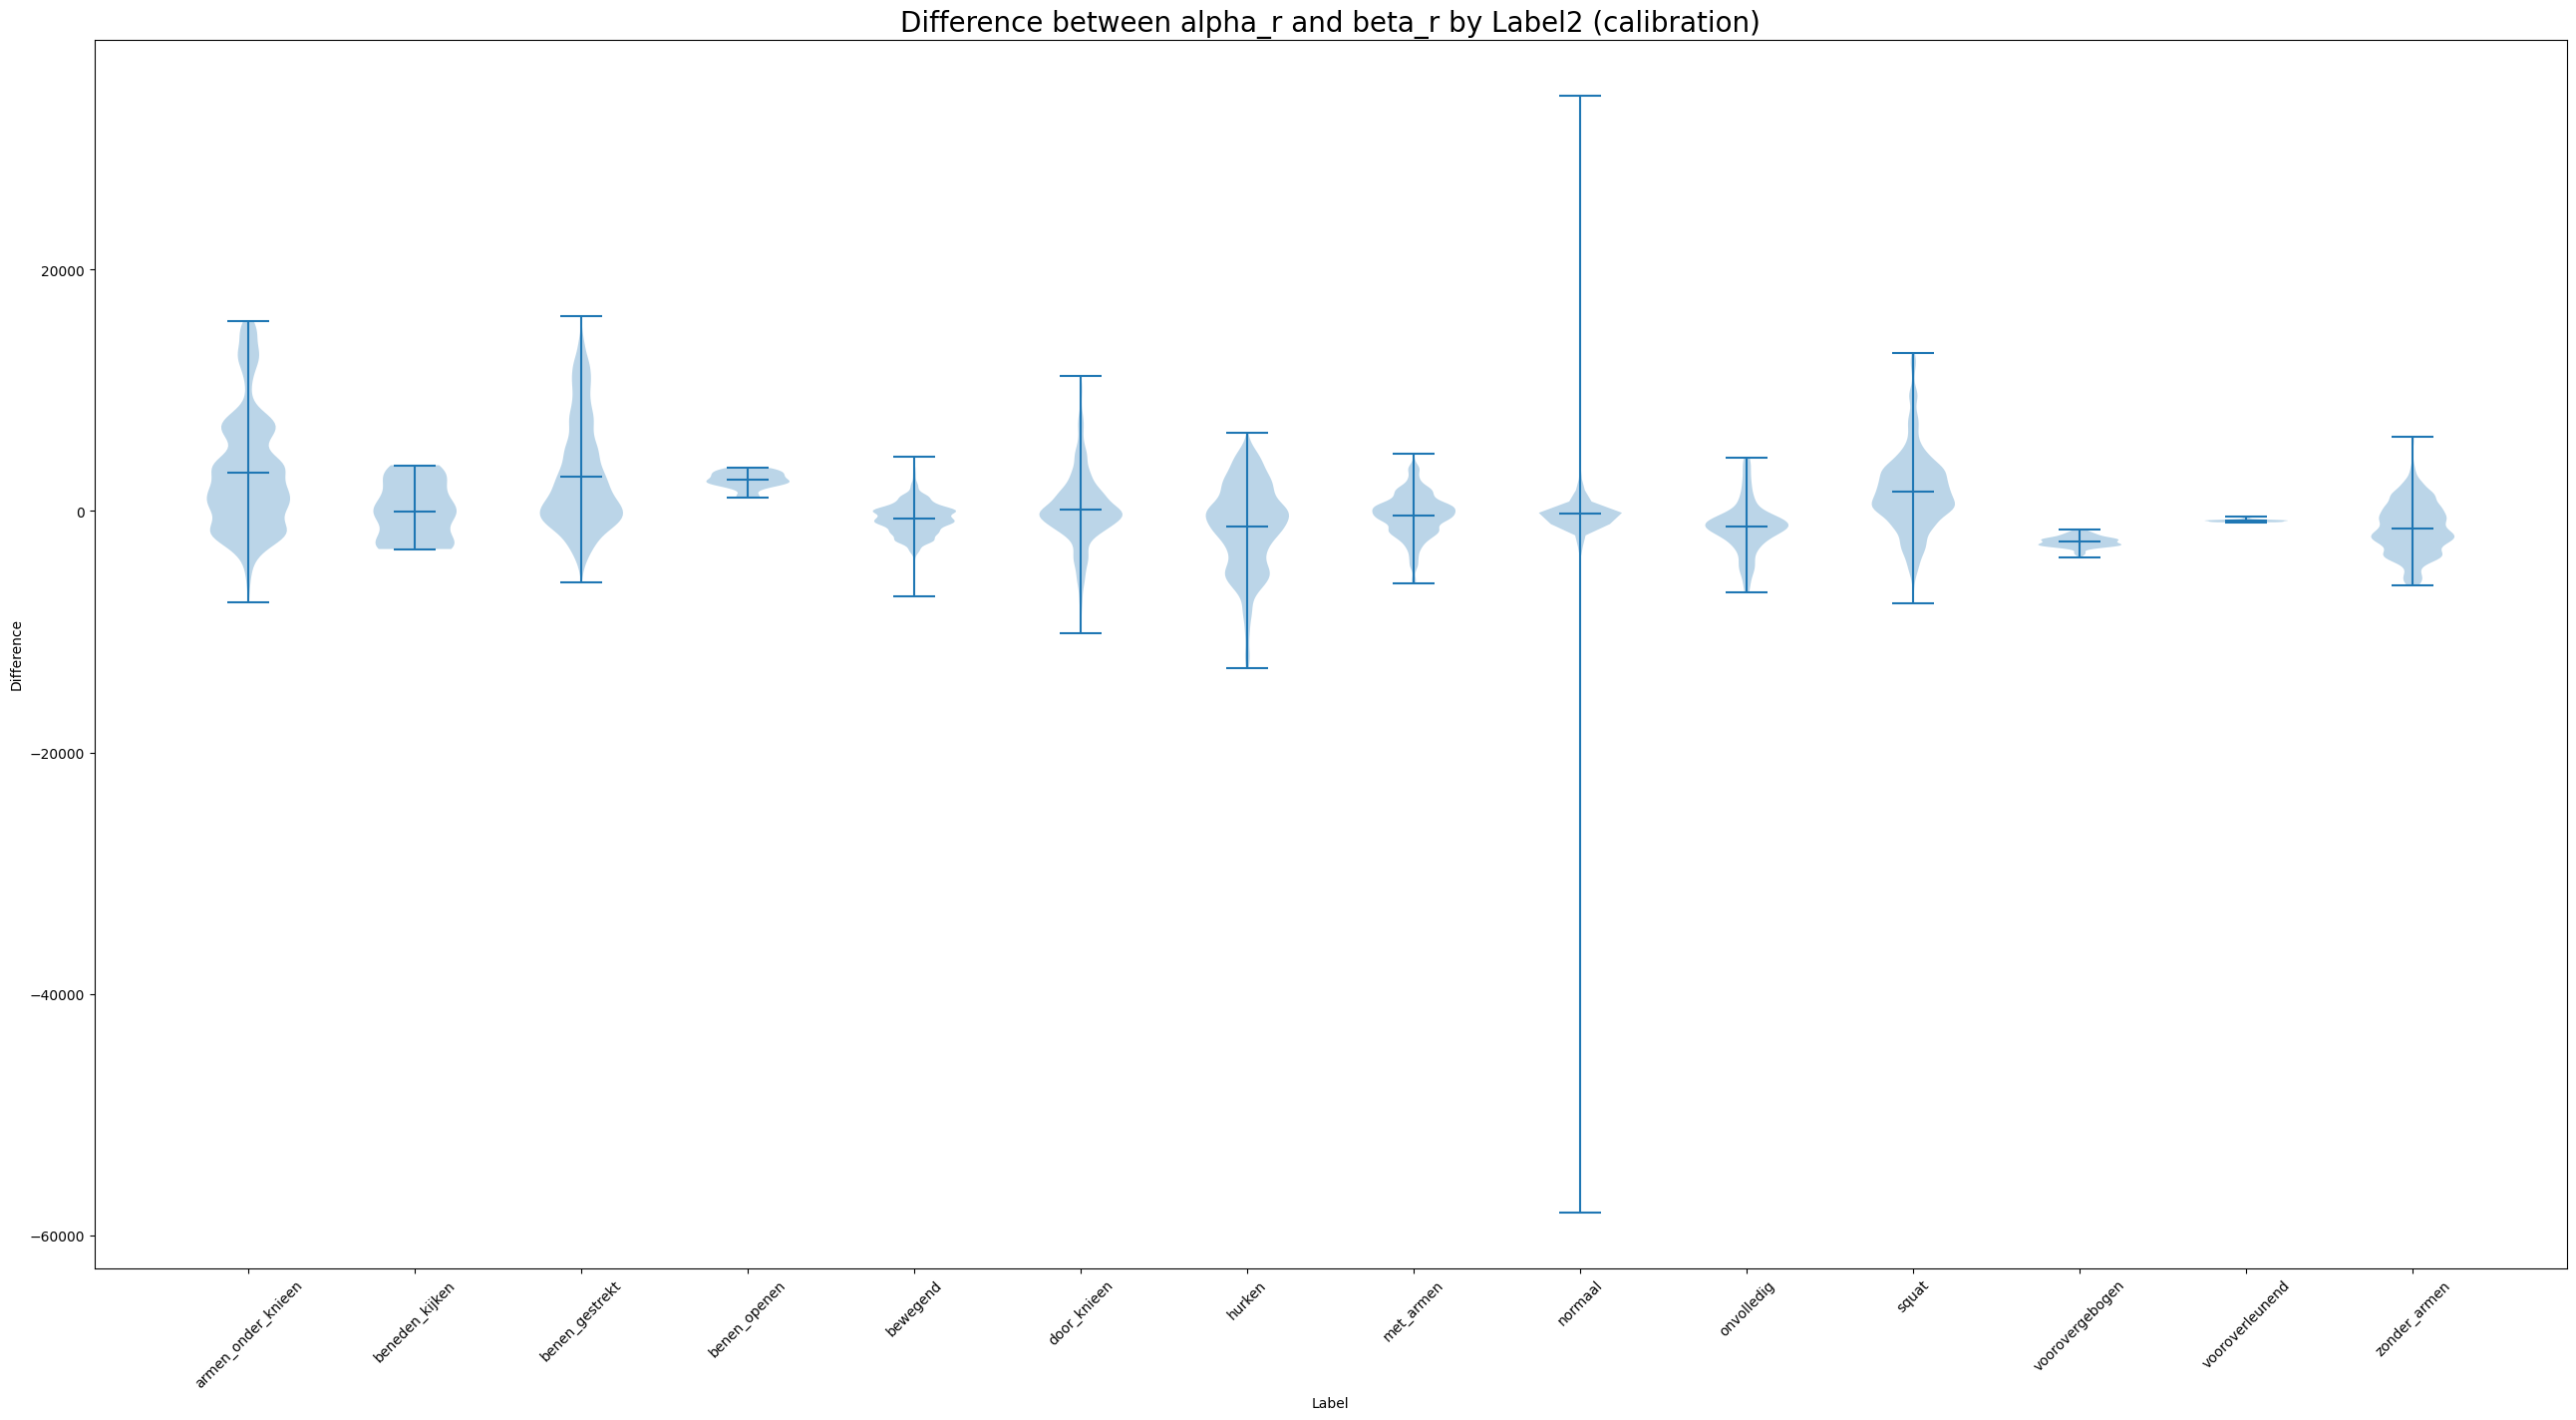

In [ ]:
### Violin Plot of difference between 'alpha_r' and 'beta_r' by 'label2'

data_to_violin = [df_analysis['ab_r_diff'][df_analysis['label2'] == 'armen_onder_knieen'],
                df_analysis['ab_r_diff'][df_analysis['label2'] == 'beneden_kijken'],
                df_analysis['ab_r_diff'][df_analysis['label2'] == 'benen_gestrekt'],
                df_analysis['ab_r_diff'][df_analysis['label2'] == 'benen_openen'],
                df_analysis['ab_r_diff'][df_analysis['label2'] == 'bewegend'],
                df_analysis['ab_r_diff'][df_analysis['label2'] == 'door_knieen'],
                df_analysis['ab_r_diff'][df_analysis['label2'] == 'hurken'],
                df_analysis['ab_r_diff'][df_analysis['label2'] == 'met_armen'],
                df_analysis['ab_r_diff'][df_analysis['label2'] == 'normaal'],
                df_analysis['ab_r_diff'][df_analysis['label2'] == 'onvolledig'],
                df_analysis['ab_r_diff'][df_analysis['label2'] == 'squat'],
                df_analysis['ab_r_diff'][df_analysis['label2'] == 'voorovergebogen'],
                df_analysis['ab_r_diff'][df_analysis['label2'] == 'vooroverleunend'],
                df_analysis['ab_r_diff'][df_analysis['label2'] == 'zonder_armen']]


fig = plt.figure(figsize=(32, 16))
ax = fig.add_subplot(111)

x_pos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
x_labels = ['armen_onder_knieen', 'beneden_kijken', 'benen_gestrekt', 'benen_openen', 'bewegend', 'door_knieen', 'hurken',
           'met_armen', 'normaal', 'onvolledig', 'squat', 'voorovergebogen', 'vooroverleunend', 'zonder_armen']

vp = ax.violinplot(data_to_violin, showmeans=True, showextrema=True)

plt.title('Difference between alpha_r and beta_r by Label2 (calibration)', fontsize=20)
plt.xlabel('Label')
plt.ylabel('Difference')
plt.xticks(x_pos, x_labels, rotation=45)

plt.show()